### 1. Carga del Dataset:
  * El dataset contiene información sobre clientes de un centro comercial, como su género, edad, ingresos anuales y puntaje de gasto.
  * Utiliza el archivo «Mall_Customers.csv» y cárgalo en tu entorno de trabajo.

In [10]:
# importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans 

In [11]:
# cargamos el dataset
ruta='../data/Mall_Customers.csv'
df = pd.read_csv(filepath_or_buffer=ruta, sep=',')
df.shape

(200, 5)

In [12]:
df.info() # vemos informacion sobre el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.describe() # mostramos la estadistica descriptiva del dataframe

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 2. Selección de Variables:
  * Para este análisis, selecciona las variables ‘Annual Income (k$)’ y ‘Spending Score (1-100)’, ya que representan características importantes relacionadas con el comportamiento de compra.

In [14]:
# seleccionamos las variables 'Annual Income (k$)' y 'Spending Score (1-100)' para nuestro análisis
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
# mostramos las primeras filas de las variables seleccionadas
print(X.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


### 3. Implementación de K-means:
  * Aplica el algoritmo K-means utilizando diferentes valores de K (por ejemplo, K = 3, 4, 5) y observa cómo se agrupan los clientes.
  * Visualiza los resultados utilizando gráficos de dispersión que representen los clusters y los centroides.

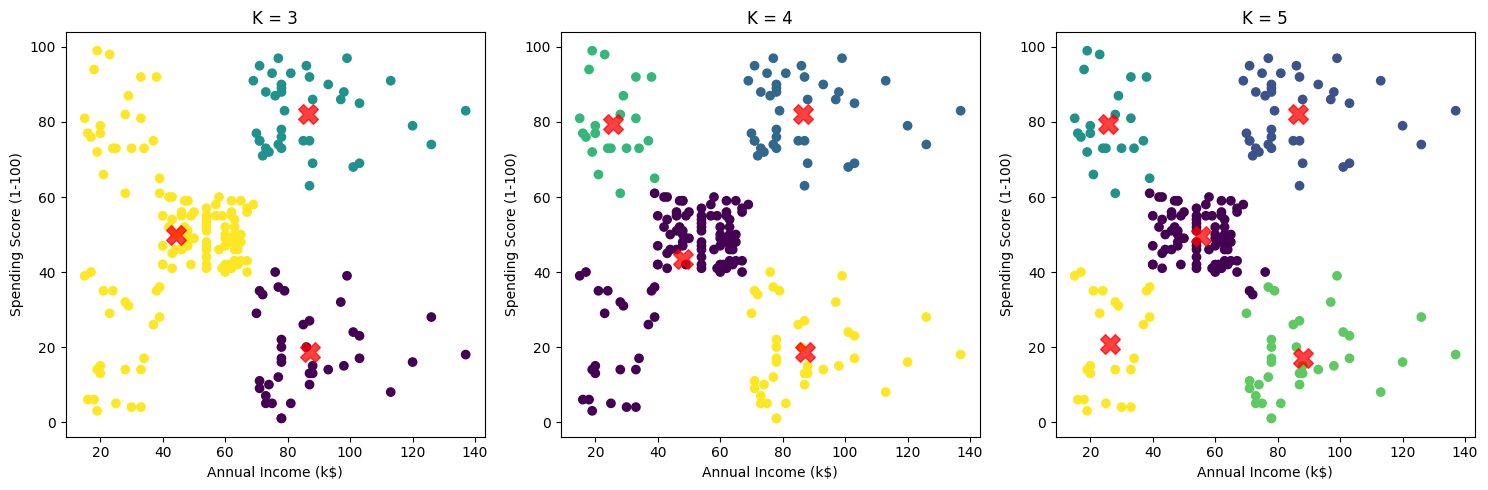

In [15]:
k_values = [3, 4, 5] # definimos diferentes valores de K que vamos a probar
plt.figure(figsize=(15, 5)) # creamos un gráfico para visualizar los clusters

for i, k in enumerate(k_values):
    # inicializamos el modelo K-means con el valor actual de K
    kmeans = KMeans(n_clusters=k, random_state=42)
    # ajustamos el modelo a nuestros datos seleccionados
    kmeans.fit(X)
    # predecimos los clusters para cada cliente
    labels = kmeans.predict(X)
    # graficamos los resultados en un gráfico de dispersión
    plt.subplot(1, len(k_values), i + 1)  # organizamos los gráficos en una fila
    plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels, cmap='viridis')  # graficamos los puntos coloreados por cluster
    # graficamos los centroides de cada cluster
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')  # graficamos los centroides en rojo
    plt.title(f'K = {k}')  # añadimos un título indicando el valor de K
    plt.xlabel('Annual Income (k$)')  # etiquetamos el eje x
    plt.ylabel('Spending Score (1-100)')  # etiquetamos el eje y

plt.tight_layout()  # ajustamos el diseño del gráfico para que no se superpongan
plt.show()  # mostramos todos los gráficos generados

### 4. Elbow Method:
  * Utiliza el método del codo para identificar el número óptimo de clusters. Este método consiste en ejecutar K-means con diferentes valores de K y calcular la suma de errores cuadráticos (SSE). El valor óptimo de K se encuentra donde se produce una disminución significativa en el SSE.

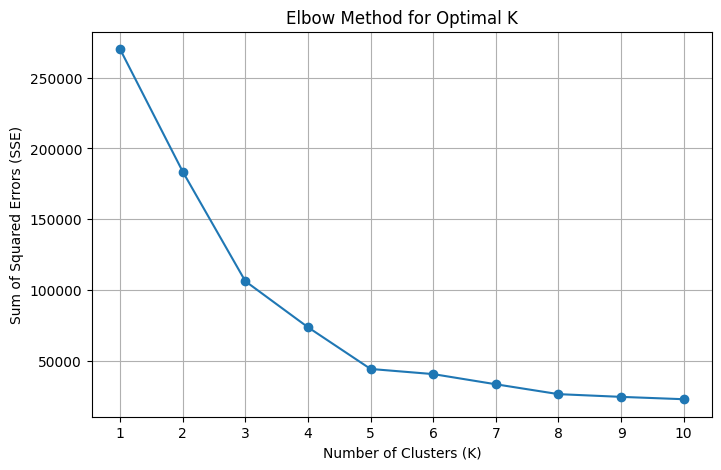

In [16]:
sse = [] # inicializamos una lista para almacenar la suma de errores cuadráticos (SSE)
# probamos diferentes valores de K para encontrar el número óptimo de clusters
for k in range(1, 11):  # probamos valores de K desde 1 hasta 10
    kmeans = KMeans(n_clusters=k, random_state=42)  # inicializamos el modelo con el valor actual de K
    kmeans.fit(X)  # ajustamos el modelo a nuestros datos seleccionados
    sse.append(kmeans.inertia_)  # almacenamos el SSE en la lista

# graficamos el método del codo para visualizar la relación entre K y SSE
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')  # graficamos SSE contra K con marcadores en los puntos
plt.title('Elbow Method for Optimal K')  # añadimos un título al gráfico
plt.xlabel('Number of Clusters (K)')  # etiquetamos el eje x
plt.ylabel('Sum of Squared Errors (SSE)')  # etiquetamos el eje y
plt.xticks(range(1, 11))  # aseguramos que los ticks del eje x sean enteros desde 1 hasta 10

plt.grid()  # añadimos una cuadrícula al gráfico para facilitar la lectura
plt.show()  # mostramos la gráfica del método del codo

### 5. Interpretación de Clusters:
  * Una vez obtenidos los clusters, analiza cada grupo. ¿Qué características tienen en común los clientes de cada cluster? ¿Cómo podrías usar esta información para diseñar estrategias de marketing personalizadas?

In [17]:
df['Cluster'] = kmeans.labels_   # añadimos la etiqueta del cluster al dataframe original para análisis posterior
# mostramos cuántos clientes hay en cada cluster
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

Cluster
0    71
2    27
5    25
6    15
3    14
4    12
8    12
1    11
7    10
9     3
Name: count, dtype: int64


In [18]:
# agrupamos los datos por la columna Cluster y calculamos la media de las columnas Age, Annual Income (k$) y Spending Score
cluster_analysis = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_analysis) # mostramos el resultado de la media por cada clúster

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        43.450704           56.464789               49.774648
1        32.636364           97.090909               86.090909
2        40.629630           79.000000               16.592593
3        25.000000           23.428571               84.785714
4        48.750000           24.583333                9.583333
5        32.760000           76.960000               80.800000
6        39.266667           31.533333               35.866667
7        41.000000          109.700000               22.000000
8        31.583333           33.500000               66.250000
9        32.333333          127.666667               78.666667


### 6. Análisis de Resultados:


* Los clusters con ingresos bajos muestran una mayor sensibilidad al precio, lo que indica que las promociones y descuentos son cruciales para atraer a estos clientes.
* Los grupos más jóvenes tienden a priorizar experiencias sobre bienes materiales, lo que implica que las marcas deben considerar ofrecer servicios o productos que mejoren la experiencia del cliente.
* Los clusters con altos ingresos pero bajo gasto reflejan un comportamiento cauteloso, sugiriendo que estos consumidores valoran más la calidad y la reputación de la marca antes de realizar una compra.